## Matches Review

related to the file "matches_at_0.6 distance.xlsx"

In [64]:
import pandas as pd
import numpy as np

Original Augmentation Manifesto

In [31]:
augmentation_manifesto = pd.read_csv('/home/felipeb/augmenter/augmented_dataset_manifest')

In [32]:
lowres = pd.read_excel('matches_at_0.6_distance.xlsx',sheet_name='lowresvideos')

In [33]:
augmentation_manifesto['new_filename_noext'] = augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0])

In [34]:
augmentation_manifesto.head()

,Unnamed: 0,banner,bitrate,color_intensity,crop,extension,file_path,intensity,logo,offset,shaky,shaky_after_logo,speed_change,filename,original_extension,new_filename,new_filename_noext
0,0,NaN,32k,0.42,NaN,NaN,/datadrive/videos/BVx0nR366sk-3b0933b1902d9a66...,-0.09,NaN,NaN,False,True,-0.09,BVx0nR366sk-3b0933b1902d9a66730d447258c425ec,webm,16560611413745a1b33748cad5cdb726.webm,16560611413745a1b33748cad5cdb726
1,1,NaN,64k,0.24,NaN,NaN,/datadrive/videos/6Y1uTg7wCV8-b068dba553b7529e...,-0.05,logos/jazeera.png,6.0,False,True,NaN,6Y1uTg7wCV8-b068dba553b7529eb2c2c4727c47fed9,webm,4fe31156621142de9be93e3c6a4a8bd9.webm,4fe31156621142de9be93e3c6a4a8bd9
2,2,False,NaN,NaN,NaN,NaN,/datadrive/videos/VuW-M9TB7tM-73472a9187f950d4...,-0.12,logos/fox.png,2.0,False,False,NaN,VuW-M9TB7tM-73472a9187f950d4812582d25154f1d4,mp4,49f397b693eb41a9b7c8a95b0147c6a0.mp4,49f397b693eb41a9b7c8a95b0147c6a0
3,3,NaN,NaN,NaN,[0.11 0.15],NaN,/datadrive/videos/gMz2bJykKaY-31b60bdf2a061902...,NaN,NaN,3.0,False,True,0.34,gMz2bJykKaY-31b60bdf2a061902a1c004eab2ced596,webm,e366f4367c2148c3bb4e88a6bf3b0835.webm,e366f4367c2148c3bb4e88a6bf3b0835
4,4,NaN,NaN,NaN,[0.04 0.03],NaN,/datadrive/videos/6QWIAsPOlxM-907ba6ac2932e487...,-0.19,logos/sbt.gif,3.0,False,False,0.31,6QWIAsPOlxM-907ba6ac2932e487c215c9b364d06e14,webm,7611fe4baab94392a82f5a8a28bdeba2.webm,7611fe4baab94392a82f5a8a28bdeba2


In [35]:
lowres.head()

,vid
0,19fa48bf09544f80a7953a3f5240f704
1,17f60675f799466d85fad43d6a9ec475
2,10f76d1b56d547998a9abb13ff96e0f0
3,18f75a94043140d0a10bfdb3b0c8c027
4,a18444977736411fab577643ad40e1c9


In [36]:
msk1 = augmentation_manifesto['filename'].isin(lowres['vid'])
msk2 = augmentation_manifesto['new_filename_noext'].isin(lowres['vid'])
msk = (msk1) | (msk2)

In [37]:
augmentation_manifesto['lowres'] = False
augmentation_manifesto.loc[msk,'lowres'] = True

In [38]:
augmentation_manifesto.pivot_table(values='new_filename',aggfunc='count',index='bitrate',columns=['lowres'])

lowres,False,True
bitrate,,
128k,441.0,NaN
16k,424.0,21.0
32k,357.0,7.0
64k,464.0,4.0


In [60]:
augmentation_manifesto.head()

,Unnamed: 0,banner,bitrate,color_intensity,crop,extension,file_path,intensity,logo,offset,shaky,shaky_after_logo,speed_change,filename,original_extension,new_filename,new_filename_noext,lowres
0,0,NaN,32k,0.42,NaN,NaN,/datadrive/videos/BVx0nR366sk-3b0933b1902d9a66...,-0.09,NaN,NaN,False,True,-0.09,BVx0nR366sk-3b0933b1902d9a66730d447258c425ec,webm,16560611413745a1b33748cad5cdb726.webm,16560611413745a1b33748cad5cdb726,False
1,1,NaN,64k,0.24,NaN,NaN,/datadrive/videos/6Y1uTg7wCV8-b068dba553b7529e...,-0.05,logos/jazeera.png,6.0,False,True,NaN,6Y1uTg7wCV8-b068dba553b7529eb2c2c4727c47fed9,webm,4fe31156621142de9be93e3c6a4a8bd9.webm,4fe31156621142de9be93e3c6a4a8bd9,False
2,2,False,NaN,NaN,NaN,NaN,/datadrive/videos/VuW-M9TB7tM-73472a9187f950d4...,-0.12,logos/fox.png,2.0,False,False,NaN,VuW-M9TB7tM-73472a9187f950d4812582d25154f1d4,mp4,49f397b693eb41a9b7c8a95b0147c6a0.mp4,49f397b693eb41a9b7c8a95b0147c6a0,False
3,3,NaN,NaN,NaN,[0.11 0.15],NaN,/datadrive/videos/gMz2bJykKaY-31b60bdf2a061902...,NaN,NaN,3.0,False,True,0.34,gMz2bJykKaY-31b60bdf2a061902a1c004eab2ced596,webm,e366f4367c2148c3bb4e88a6bf3b0835.webm,e366f4367c2148c3bb4e88a6bf3b0835,False
4,4,NaN,NaN,NaN,[0.04 0.03],NaN,/datadrive/videos/6QWIAsPOlxM-907ba6ac2932e487...,-0.19,logos/sbt.gif,3.0,False,False,0.31,6QWIAsPOlxM-907ba6ac2932e487c215c9b364d06e14,webm,7611fe4baab94392a82f5a8a28bdeba2.webm,7611fe4baab94392a82f5a8a28bdeba2,False


In [109]:
low_res16 = augmentation_manifesto.loc[augmentation_manifesto['bitrate']=='32k',:]
sample_non_labeled = np.random.choice(low_res16.loc[low_res16['lowres'] == False]['new_filename'],size=10)
sample_labeled = np.random.choice(low_res16.loc[low_res16['lowres'] == True]['new_filename'],size=10)


In [110]:
import io
import base64
from IPython.display import HTML
def show_video(fp):
    video = io.open('/datadrive/augmented_videos/' + fp, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii')))

In [116]:
show_video(sample_labeled[4])

In [57]:
augmentation_manifesto.pivot_table(values='new_filename',aggfunc='count',index='original_extension',columns=['lowres'])

lowres,False,True
original_extension,,
mp4,1388,30
webm,2080,2


In [58]:
augmentation_manifesto.pivot_table(values='new_filename',aggfunc='count',index='logo',columns=['lowres'])

lowres,False,True
logo,,
logos/another.gif,168.0,NaN
logos/download.png,218.0,2.0
logos/fox.png,182.0,2.0
logos/ge.gif,191.0,1.0
logos/jazeera.png,203.0,2.0
logos/msnbc.png,194.0,2.0
logos/new.gif,196.0,3.0
logos/openair.gif,198.0,2.0
logos/sbt.gif,186.0,2.0


In [40]:
augmentation_manifesto.head()

,Unnamed: 0,banner,bitrate,color_intensity,crop,extension,file_path,intensity,logo,offset,shaky,shaky_after_logo,speed_change,filename,original_extension,new_filename,new_filename_noext,lowres
0,0,NaN,32k,0.42,NaN,NaN,/datadrive/videos/BVx0nR366sk-3b0933b1902d9a66...,-0.09,NaN,NaN,False,True,-0.09,BVx0nR366sk-3b0933b1902d9a66730d447258c425ec,webm,16560611413745a1b33748cad5cdb726.webm,16560611413745a1b33748cad5cdb726,False
1,1,NaN,64k,0.24,NaN,NaN,/datadrive/videos/6Y1uTg7wCV8-b068dba553b7529e...,-0.05,logos/jazeera.png,6.0,False,True,NaN,6Y1uTg7wCV8-b068dba553b7529eb2c2c4727c47fed9,webm,4fe31156621142de9be93e3c6a4a8bd9.webm,4fe31156621142de9be93e3c6a4a8bd9,False
2,2,False,NaN,NaN,NaN,NaN,/datadrive/videos/VuW-M9TB7tM-73472a9187f950d4...,-0.12,logos/fox.png,2.0,False,False,NaN,VuW-M9TB7tM-73472a9187f950d4812582d25154f1d4,mp4,49f397b693eb41a9b7c8a95b0147c6a0.mp4,49f397b693eb41a9b7c8a95b0147c6a0,False
3,3,NaN,NaN,NaN,[0.11 0.15],NaN,/datadrive/videos/gMz2bJykKaY-31b60bdf2a061902...,NaN,NaN,3.0,False,True,0.34,gMz2bJykKaY-31b60bdf2a061902a1c004eab2ced596,webm,e366f4367c2148c3bb4e88a6bf3b0835.webm,e366f4367c2148c3bb4e88a6bf3b0835,False
4,4,NaN,NaN,NaN,[0.04 0.03],NaN,/datadrive/videos/6QWIAsPOlxM-907ba6ac2932e487...,-0.19,logos/sbt.gif,3.0,False,False,0.31,6QWIAsPOlxM-907ba6ac2932e487c215c9b364d06e14,webm,7611fe4baab94392a82f5a8a28bdeba2.webm,7611fe4baab94392a82f5a8a28bdeba2,False


In [44]:
augmentation_manifesto.pivot_table(values='color_intensity',aggfunc=['mean','max','min'],index='lowres')

,mean,max,min
,color_intensity,color_intensity,color_intensity
lowres,,,
False,0.603218,0.99,0.20
True,0.793077,0.99,0.26


In [45]:
augmentation_manifesto.pivot_table(values='intensity',aggfunc=['mean','max','min'],index='lowres')

,mean,max,min
,intensity,intensity,intensity
lowres,,,
False,-0.00428,0.19,-0.2
True,-0.02450,0.19,-0.2


In [46]:
augmentation_manifesto.pivot_table(values='offset',aggfunc=['mean','max','min'],index='lowres')

,mean,max,min
,offset,offset,offset
lowres,,,
False,4.473503,9.0,0.0
True,4.500000,8.0,1.0


In [47]:
augmentation_manifesto.pivot_table(values='new_filename',aggfunc='count',index='shaky',columns=['lowres'])

lowres,False,True
shaky,,
False,3122,28
True,346,4


In [48]:
augmentation_manifesto.pivot_table(values='speed_change',aggfunc=['mean','max','min'],index='lowres')

,mean,max,min
,speed_change,speed_change,speed_change
lowres,,,
False,-0.003048,0.39,-0.40
True,0.046429,0.38,-0.36


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f519e6244a8>]],
      dtype=object)

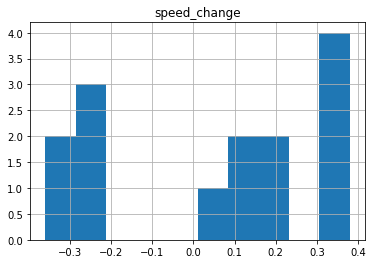

In [55]:
augmentation_manifesto.loc[augmentation_manifesto['lowres'] == True,['speed_change']].hist()

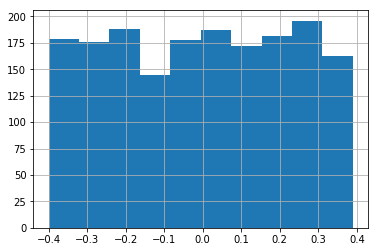

In [54]:
augmentation_manifesto['speed_change'].hist()